# Storytelling Data Visualization

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Stories
![Sample Image](./image1.png)

Is presenting the top 20 countries according to death toll really a story?

In a broad sense, a story is a sequence of events: something happens, then something else happens, and so on. Rather than events, our graph above presents facts.

Another story element is change: something or someone changes throughout the story. Our graph is static: the information we present doesn't show any element of change.

There's nothing wrong with showing facts or presenting static information, but that's not a story. To create a data story, we need to wrap those numerical facts into events that show change.

For our example above, we can take the particular case of the United States and show how the death toll has changed since the beginning of the pandemic. Below, we see an example of a data story:
![Sample Image](./image2.png)

This data story shows the evolution of the death toll in the United States. At the end of March, we see the death toll at 2,398 deaths, but in December, it became 295,406 — it has changed. Following the four line plots, we see a sequence of events that led to that change. For instance, a surge in the average number of daily deaths starting in April resulted in a large number of deaths at the end of June.

Note that if we break down the graph, this is still a lot of numerical facts. We've just assembled them into a sequence of events that are logically and temporally connected and create meaning together — a story.


### Grid Charts in Matplotlib
The data story visualization we showed on the previous screen is the result of using Matplotlib's object-oriented interface. The visualization is a grid chart composed of four different line plots — with a configuration of four rows by one column.

We'll learn how to recreate this graph throughout this lesson. We begin with creating a grid chart of four rows by one column using the `plt.subplots()` function. We also adjust the figure size to `(6, 8)` since we want to keep a mobile-friendly ratio.

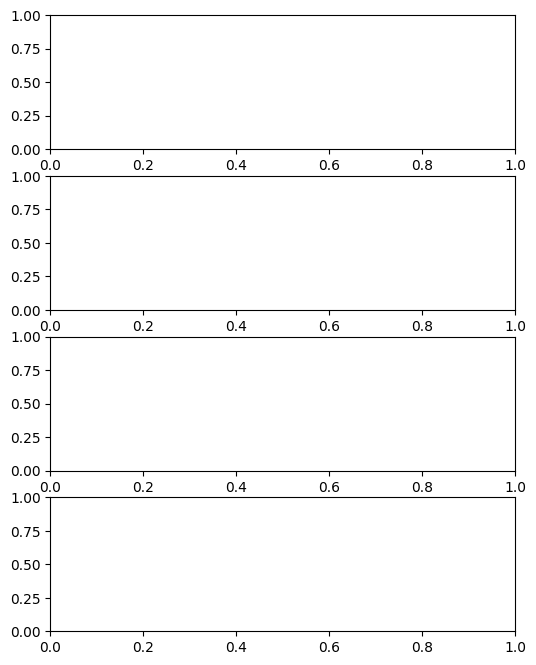

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
plt.show()

The function returns two objects: a `Figure` and an array of four `Axes` objects. We use `(ax1, ax2, ax3, ax4)` to assign each object within that array to a different variable.

To draw on the individual plots, we can use Matplotlib methods on each of the four `Axes` objects. Below, we draw a line plot on the first and the third plot.


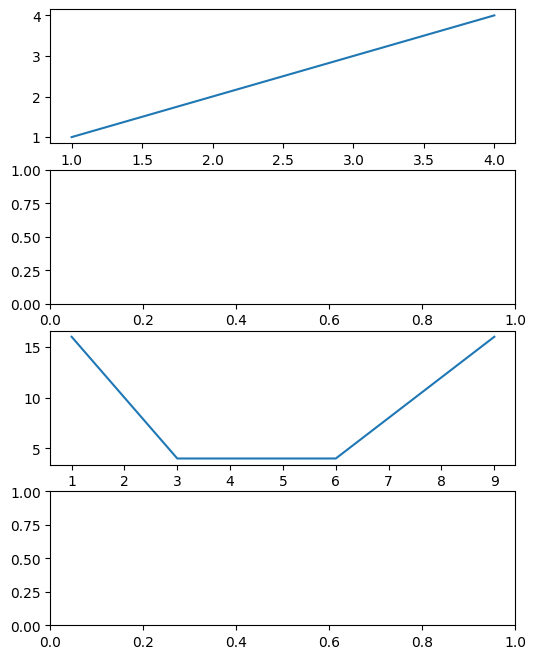

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
ax1.plot([1,2,3,4], [1,2,3,4])
ax3.plot([1,3,6,9], [16,4,4,16])
plt.show()

Now, we'll draw the four line plots that show the evolution of average daily deaths per month in 2020. We collected the data from the [World Health Organization](https://covid19.who.int/) on December 15th, 2020.

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448


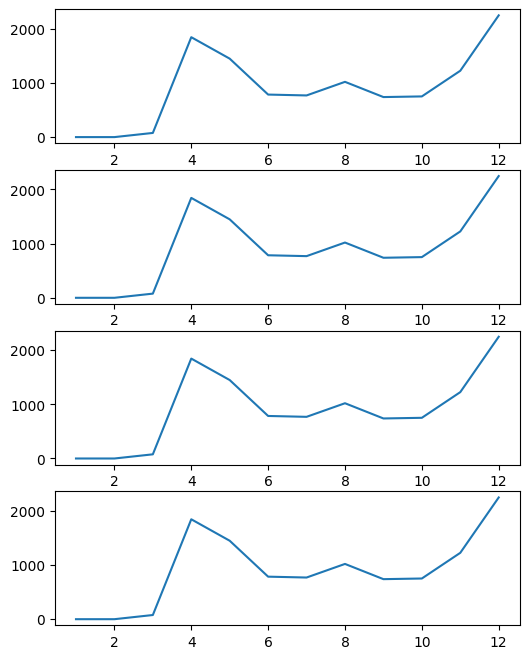

In [14]:
# Read in the covid_avg_deaths.csv file into a pandas DataFrame, and assign the result to a variable named death_toll
death_toll = pd.read_csv('covid_avg_deaths.csv')
display(death_toll.head())
# Create a grid chart of four rows by one column with a figure size of (6, 8).
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
# On each of the four plots, draw a line plot with the Month column on the x-axis and the New_deaths columns on the y-axis.
ax1.plot(death_toll['Month'], death_toll['New_deaths'])
ax2.plot(death_toll['Month'], death_toll['New_deaths'])
ax3.plot(death_toll['Month'], death_toll['New_deaths'])
ax4.plot(death_toll['Month'], death_toll['New_deaths'])
plt.show()

In the spirit of maximizing the **data-ink ratio**, let's remove the ticks and the spines (the x- and y-axes) as well as remove the y- and x-tick labels. We can also use the loop to apply a change to all Axes objects. 

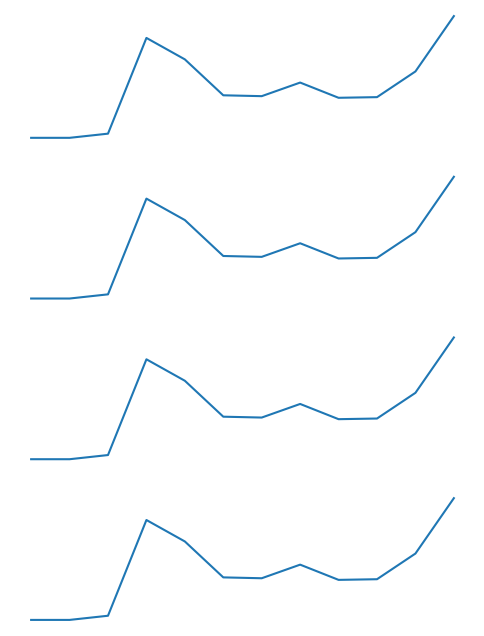

In [18]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
for ax in [ax1, ax2, ax3, ax4]:
    ax.plot(death_toll['Month'], death_toll['New_deaths'])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=False, left=False)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
plt.show()

### Modifying the Line Plots
The storytelling data visualization we first showed emphasizes four periods:

- January–March
- March–June
- June–October
- October–December

To highlight these four periods, we begin by coloring all plots in a shade of red. Then, we increase their transparency by using the `alpha` parameter.


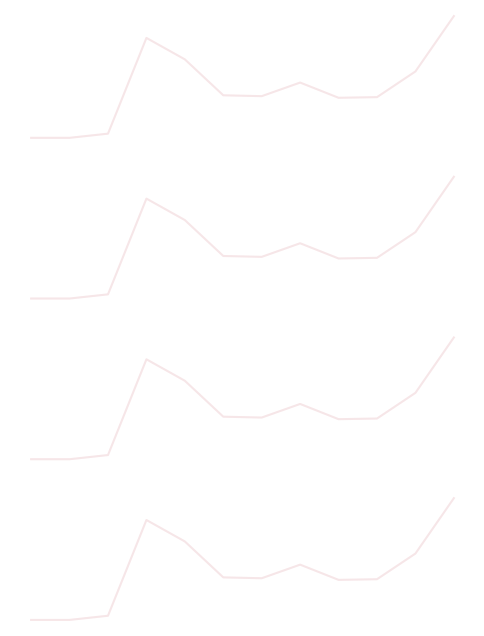

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8), )

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
    

Now, we draw separate line plots on top of the current ones. We begin by drawing the first one — we use the same color and increase the line width using the `linewidth` parameter.

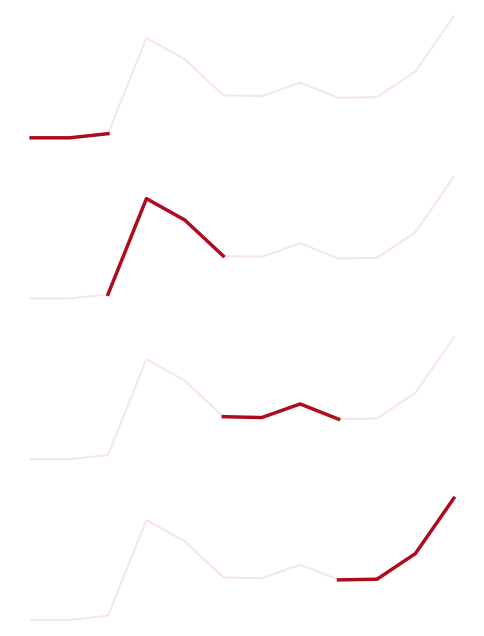

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8), )

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
          color='#af0b1e', linewidth=2.5)
ax3.plot(death_toll['Month'][5:9], death_toll['New_deaths'][5:9], 
          color='#af0b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][8:], death_toll['New_deaths'][8:], 
          color='#af0b1e', linewidth=2.5)
   
             
plt.show()


### Adding Structural Elements

Right now, our graph has a very high data-ink ratio, which is good. Except for the four highlighted periods, we can't remove anything without losing important data. However, we can add structural elements to make the graph more informative. 
First, we're going to show the quantities by adding three labels on the first plot — we do this using the `Axis.text()` method. We arrived at the exact x- and y-coordinates you see below through a process of trial and error.
```python
# Assume the rest of the code is written
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
```


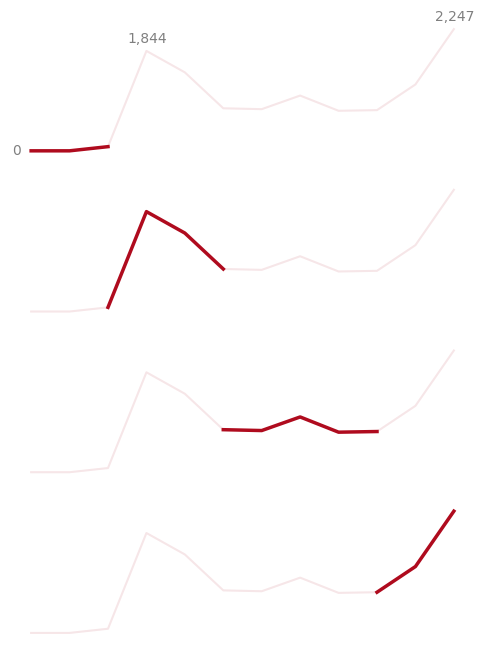

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)

ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

plt.show()

The three labels give the audience a sense of the magnitude and the range of the quantities. We only want to show people a trend, so these three labels are enough. The other three plots are identical, so we don't need to add more ink.

However, if our purpose were to show all quantities, adding only three labels wouldn't be enough. One solution is to show readers a separate table rather than decreasing the data-ink ratio with extra labels.

The three labels we added correspond to the quantities on the y-axis (the average number of daily deaths per month). On the x-axis, we have month names, and we need to make that clear.

Below, we add the 'Jan-Mar' label using Axes.text(). Specifically, notice the rotation parameter we use to slightly rotate the text.
```python
# Assume the rest of the code is written
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
```


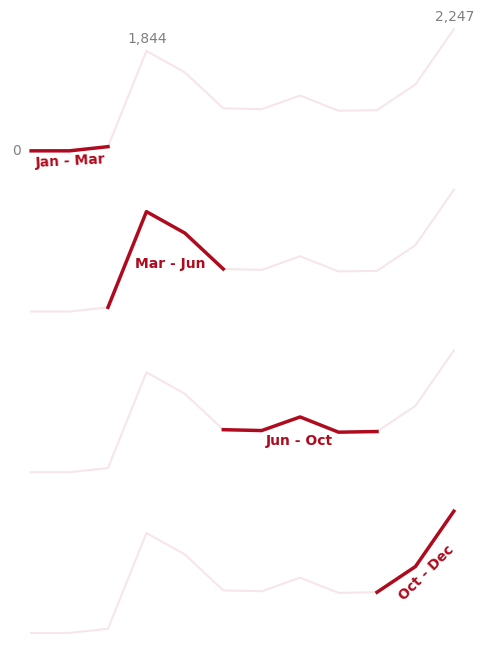

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)

ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e',
         weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', 
         weight='bold')
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', 
         weight='bold', rotation=45)
plt.show()


### Adding a Title and Subtitile
Our visualization is still not readable enough. Readers see four identical plots, a few quantities, and four distinct periods. However, they can't tell what the quantities mean.
We'll use the subtitle to inform readers about what the quantities describe. We'll use the title to tell readers what the visualization is about.

We add the title 'The virus kills 851 people each day' to the first `Axes` object. We use the `Axes.set_title()` method to add the title, and we use the `loc` parameter to position the title at the center of the plot.

```python
# Assume the rest of the code is written
ax1.text(0.5, 3500, 'The virus kills 851 people each day', color='#af0b1e', 
         weight='bold', font_size=14)
```
We add the subtitle 'Average number of daily deaths per month in the US' to the `Axis1` object. We use the `Axes.text()` method to add the subtitle.

```python
# Assume the rest of the code is written
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US', color='#af0b1e',font_size=12)
```   


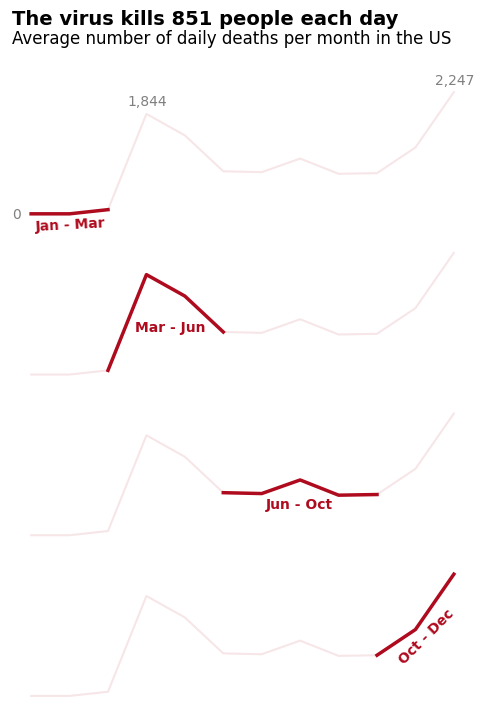

In [30]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                        figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')

ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')

ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
        rotation=45)

ax1.text(0.5, 3500, 'The virus kills 851 people each day', weight='bold', fontsize=14)

ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US', fontsize=12) 

plt.show()

### Adding a Progress Bar
The last thing we're going to add to our visualization is a progress bar.
The progress bars follow the change in the total number of cumulative deaths over the four highlighted periods. They represent a detailed breakdown of the death toll in the United States. Assuming our audience has already seen the graph below, we don't need to explain the progress bar.

We don't have a Matplotlib function specifically built for creating progress bars. Our approach, however, is to do the following:

1. Determine the basic parts of a progress bar.
2. Use Matplotlib to create those parts.

A progress bar is made of two rectangles. The rectangles are different colors, and the one with a darker shade is put on top of the other — this creates a visual sense of progress.

To create a rectangle in Matplotlib, we can draw a thick horizontal line. To draw a horizontal line, we can use the `Axes.axhline()` method. The `y` parameter specifies the y-coordinate of the horizontal line.
```python
# Assume the rest of the code is written
ax1.axhline(y=1600) 
```


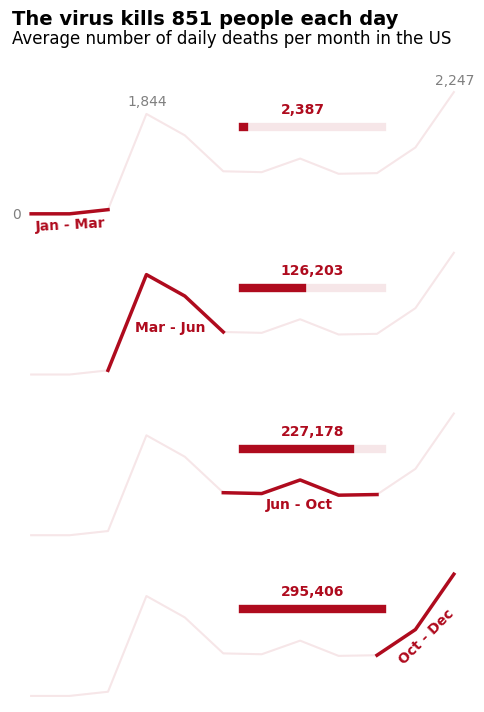

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

death_toll = pd.read_csv('covid_avg_deaths.csv')
deaths = [2387, 126203, 227178, 295406]
proportions = [round(death/295406, 2) for death in deaths]
xmax_vals = [round(0.5 + proportion * 0.3, 3) for proportion in proportions]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                        figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
                
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')


ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')


ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
        rotation=45)

# Adding Progree Bar here
for ax, xmax, death in zip(axes, xmax_vals, deaths):
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#af0b1e',
               alpha=0.1)
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#af0b1e')
    ax.text(7.5, 1850, format(death, ','),
            color='#af0b1e', weight='bold')
plt.show()